In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# 결측치 시각화를 위한 라이브러리
import missingno

In [2]:
# 병합한 채널정보 파일을 불러온다.
df1 = pd.read_csv('open/train/2018_train_채널정보_segment병합.csv')
df1

,기준년월,ID,인입횟수_ARS_R6M,이용메뉴건수_ARS_R6M,인입일수_ARS_R6M,인입월수_ARS_R6M,인입후경과월_ARS,인입횟수_ARS_B0M,이용메뉴건수_ARS_B0M,인입일수_ARS_B0M,...,당사PAY_방문월수_R6M,당사멤버쉽_방문횟수_B0M,당사멤버쉽_방문횟수_R6M,당사멤버쉽_방문월수_R6M,OS구분코드,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,홈페이지_금융건수_R3M,홈페이지_선결제건수_R3M,Segment
0,201807,TRAIN_000000,10회 이상,10회 이상,8,6,0,2,6,2,...,0,22,221,6,Android,0,0,0,0,D
1,201807,TRAIN_000001,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E
2,201807,TRAIN_000002,1회 이상,1회 이상,1,1,0,2,5,1,...,0,0,0,0,Android,11,6,5,5,C
3,201807,TRAIN_000003,10회 이상,10회 이상,10,6,0,2,6,2,...,0,23,219,6,Android,0,0,0,0,D
4,201807,TRAIN_000004,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,Android,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E
2399996,201812,TRAIN_399996,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,1,NaN,0,0,0,0,D
2399997,201812,TRAIN_399997,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,C
2399998,201812,TRAIN_399998,1회 이상,1회 이상,0,0,0,0,0,0,...,0,0,0,0,NaN,0,0,0,0,E


# 당사 PAY, 멤버쉽

In [4]:
df1['Segment'].value_counts()

Segment
E    1922052
D     349242
C     127590
A        972
B        144
Name: count, dtype: int64

In [5]:
# 분석 대상 컬럼 리스트
pay_columns = [
    "당사PAY_방문월수_R6M",
    "당사PAY_방문횟수_B0M",
    "당사PAY_방문횟수_R6M",
    "당사멤버쉽_방문월수_R6M",
    "당사멤버쉽_방문횟수_B0M",
    "당사멤버쉽_방문횟수_R6M"
]

# Segment 고객 필터링
df1_ab = df1[df1["Segment"].isin(["A", "B", "C", "D", "E" ])]

# Segment별 평균 계산
ab_pay_mean = df1_ab.groupby("Segment")[pay_columns].mean().T

# 결과 출력
ab_pay_mean


Segment,A,B,C,D,E
당사PAY_방문월수_R6M,0.000000,0.000000,0.000000,0.000000,0.000000
당사PAY_방문횟수_B0M,0.000000,0.000000,0.000000,0.000000,0.000000
당사PAY_방문횟수_R6M,0.000000,0.000000,0.000000,0.000000,0.000000
당사멤버쉽_방문월수_R6M,0.664609,0.784722,1.192264,0.996269,0.474297
당사멤버쉽_방문횟수_B0M,1.455761,2.284722,3.023215,2.436577,1.098859
당사멤버쉽_방문횟수_R6M,12.634774,17.750000,23.149259,19.663259,9.125310


<Axes: xlabel='당사멤버쉽_방문횟수_R6M', ylabel='Count'>

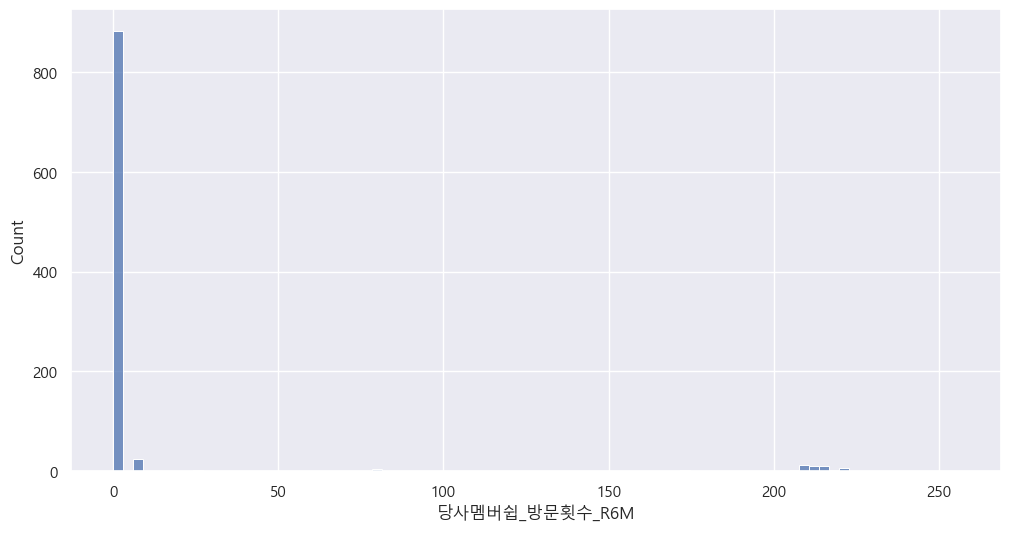

In [6]:
sns.histplot(data=df1[df1['Segment'] == 'A'], x="당사멤버쉽_방문횟수_R6M", binwidth=3)

<Axes: xlabel='당사멤버쉽_방문횟수_R6M', ylabel='Count'>

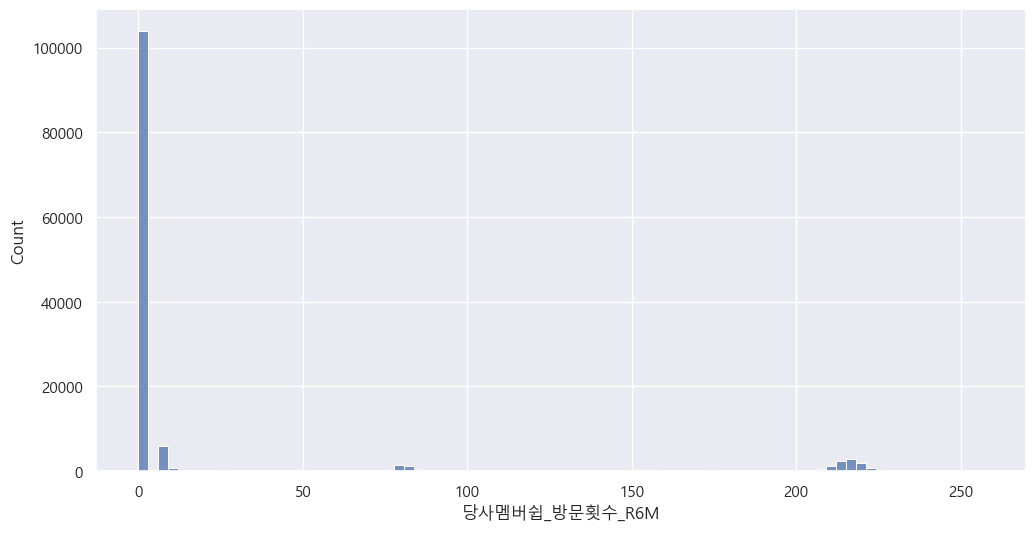

In [7]:
sns.histplot(data=df1[df1['Segment'] == 'C'], x="당사멤버쉽_방문횟수_R6M", binwidth=3)

## 📉 세그먼트 A 고객의 멤버십 방문 횟수 분포 해석

Segment A 고객의 `당사멤버쉽_방문횟수_R6M` 분포를 시각화한 결과,  
다수 고객이 `0~5회` 수준의 낮은 방문횟수를 보이며, 극소수 고객이 `100회 이상`의 방문을 함으로써  
전체 평균값(12.63)을 비정상적으로 끌어올리고 있는 것으로 나타났다.

---

### 🔍 해석

- 대부분의 고객은 방문이 거의 없음
- 일부 고객의 과도한 방문으로 평균값이 왜곡됨
- 평균값은 A 세그먼트 고객의 행동을 대표하지 못함

---

### ✅ 결론

> **해당 변수는 Segment A의 대표 특성으로 보기 어렵고,  
중앙값/분위수 기반 분석 또는 outlier 제거 후 재평가가 필요**합니다.


In [9]:
# 평균은 이상치 때문에 중앙값을 확인했다.
# 0이 과반수이다 보니 중앙값이 모든 세그먼트에서 0이 나오는 문제가 생겼다.
# 0이상인 값으로 중앙값을 구해보자.
a = df1_ab[df1_ab["당사멤버쉽_방문횟수_R6M"] > 0].groupby("Segment")["당사멤버쉽_방문횟수_R6M"].median()
a

Segment
A     8.0
B     2.0
C    23.0
D     8.0
E     8.0
Name: 당사멤버쉽_방문횟수_R6M, dtype: float64

- 중앙값도 좀 애매하다

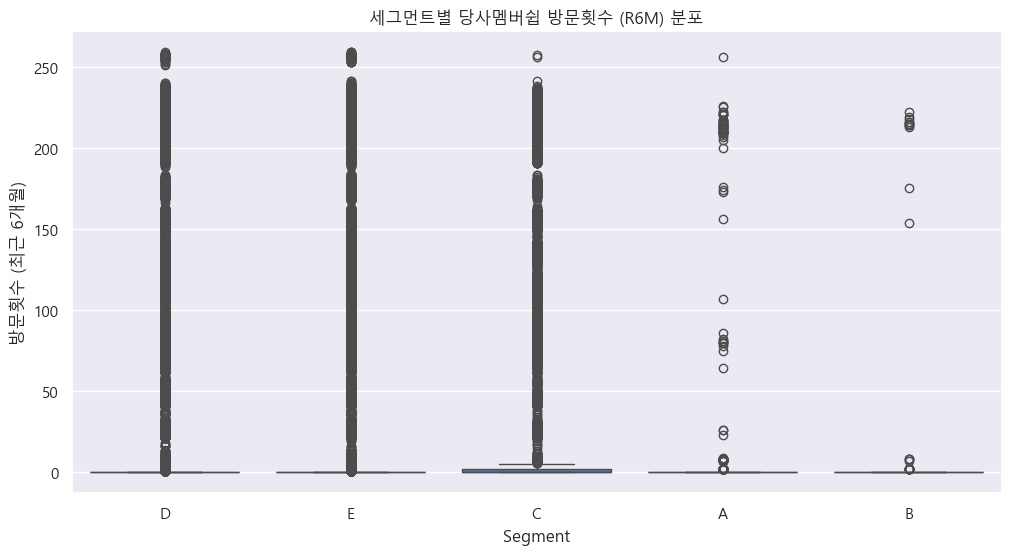

In [11]:
# 분포를 확인해보자
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1[df1['Segment'].isin(['A', 'B', 'C', 'D', 'E'])],
            x='Segment',
            y='당사멤버쉽_방문횟수_R6M')
plt.title("세그먼트별 당사멤버쉽 방문횟수 (R6M) 분포")
plt.ylabel("방문횟수 (최근 6개월)")
plt.show()
# 극단값이 의미 없는듯하다.

### 개별 컬럼 확인용

In [13]:
pd.options.display.float_format = '{:.5f}'.format
# 1. 분석 대상 컬럼 리스트 (컨택건수 관련 전체)
membership_columns = [
    "당사멤버쉽_방문월수_R6M",
    "당사멤버쉽_방문횟수_B0M",
    "당사멤버쉽_방문횟수_R6M"
]


# 2. Segment 필터링
df1_seg = df1[df1["Segment"].isin(["A", "B", "C", "D", "E"])]

# 3. 평균값 계산
membership_columns_mean = df1_seg.groupby("Segment")[membership_columns].mean().T

# B0M, R6M 컬럼명 분리
membership_columns_B0M = [col for col in membership_columns if "_B0M" in col]
membership_columns_R6M = [col for col in membership_columns if "_R6M" in col]

# 정리된 평균값에서 해당 컬럼만 출력
display(membership_columns_mean.loc[membership_columns_B0M])
display(membership_columns_mean.loc[membership_columns_R6M])

Segment,A,B,C,D,E
당사멤버쉽_방문횟수_B0M,1.45576,2.28472,3.02321,2.43658,1.09886


Segment,A,B,C,D,E
당사멤버쉽_방문월수_R6M,0.66461,0.78472,1.19226,0.99627,0.47430
당사멤버쉽_방문횟수_R6M,12.63477,17.75000,23.14926,19.66326,9.12531


### 개별확인용 - 수치형을 평균으로 먼저봤다면 실제 데이터 형태를 확인해서 비교

In [15]:
df1['당사멤버쉽_방문월수_R6M'].value_counts().sort_index()

당사멤버쉽_방문월수_R6M
0    2052315
1     116409
2      22313
3        779
4         16
5          1
6     208167
Name: count, dtype: int64

In [16]:
# 세그먼트별 '컬럼' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["당사멤버쉽_방문월수_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)

# 결과 출력
display(tm_contact_dist)

# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)

당사멤버쉽_방문월수_R6M,0,1,2,3,4,5,6
Segment,,,,,,,
A,795,72,14,0,0,0,91
B,107,21,1,0,0,0,15
C,91727,11018,1909,107,5,0,22824
D,264816,28246,4202,191,3,0,51784
E,1694870,77052,16187,481,8,1,133453


당사멤버쉽_방문월수_R6M,0,1,2,3,4,5,6
Segment,,,,,,,
A,0.81790,0.07407,0.01440,0.00000,0.00000,0.00000,0.09362
B,0.74306,0.14583,0.00694,0.00000,0.00000,0.00000,0.10417
C,0.71892,0.08635,0.01496,0.00084,0.00004,0.00000,0.17889
D,0.75826,0.08088,0.01203,0.00055,0.00001,0.00000,0.14828
E,0.88180,0.04009,0.00842,0.00025,0.00000,0.00000,0.06943


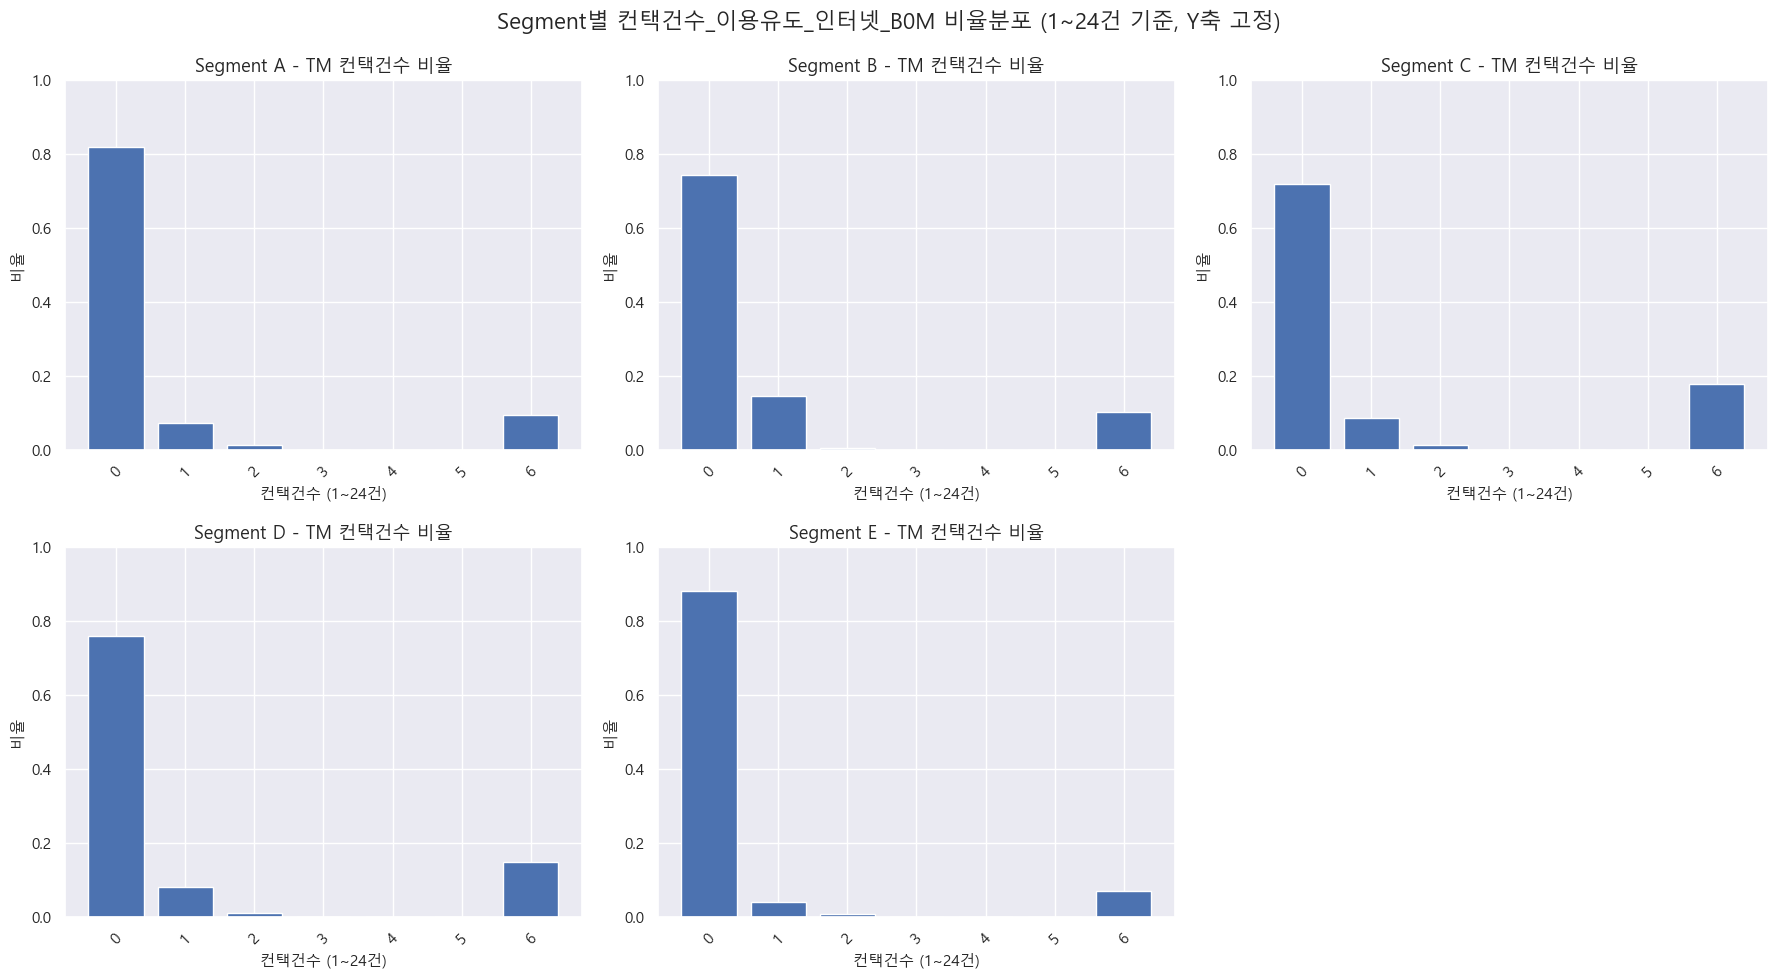

In [17]:
# 보고 싶은 범위 설정하면됨
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:63]

# 막대그래프 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    axes[i].bar(tm_contact_ratio_range.columns.astype(str), tm_contact_ratio_range.loc[seg])
    axes[i].set_title(f"Segment {seg} - TM 컨택건수 비율", fontsize=13)
    axes[i].set_xlabel("컨택건수 (1~24건)", fontsize=11)
    axes[i].set_ylabel("비율", fontsize=11)
    axes[i].set_ylim(0, 1)  # Y축 고정
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y')

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 컨택건수_이용유도_인터넷_B0M 비율분포 (1~24건 기준, Y축 고정)", fontsize=16)
plt.tight_layout()
plt.show()


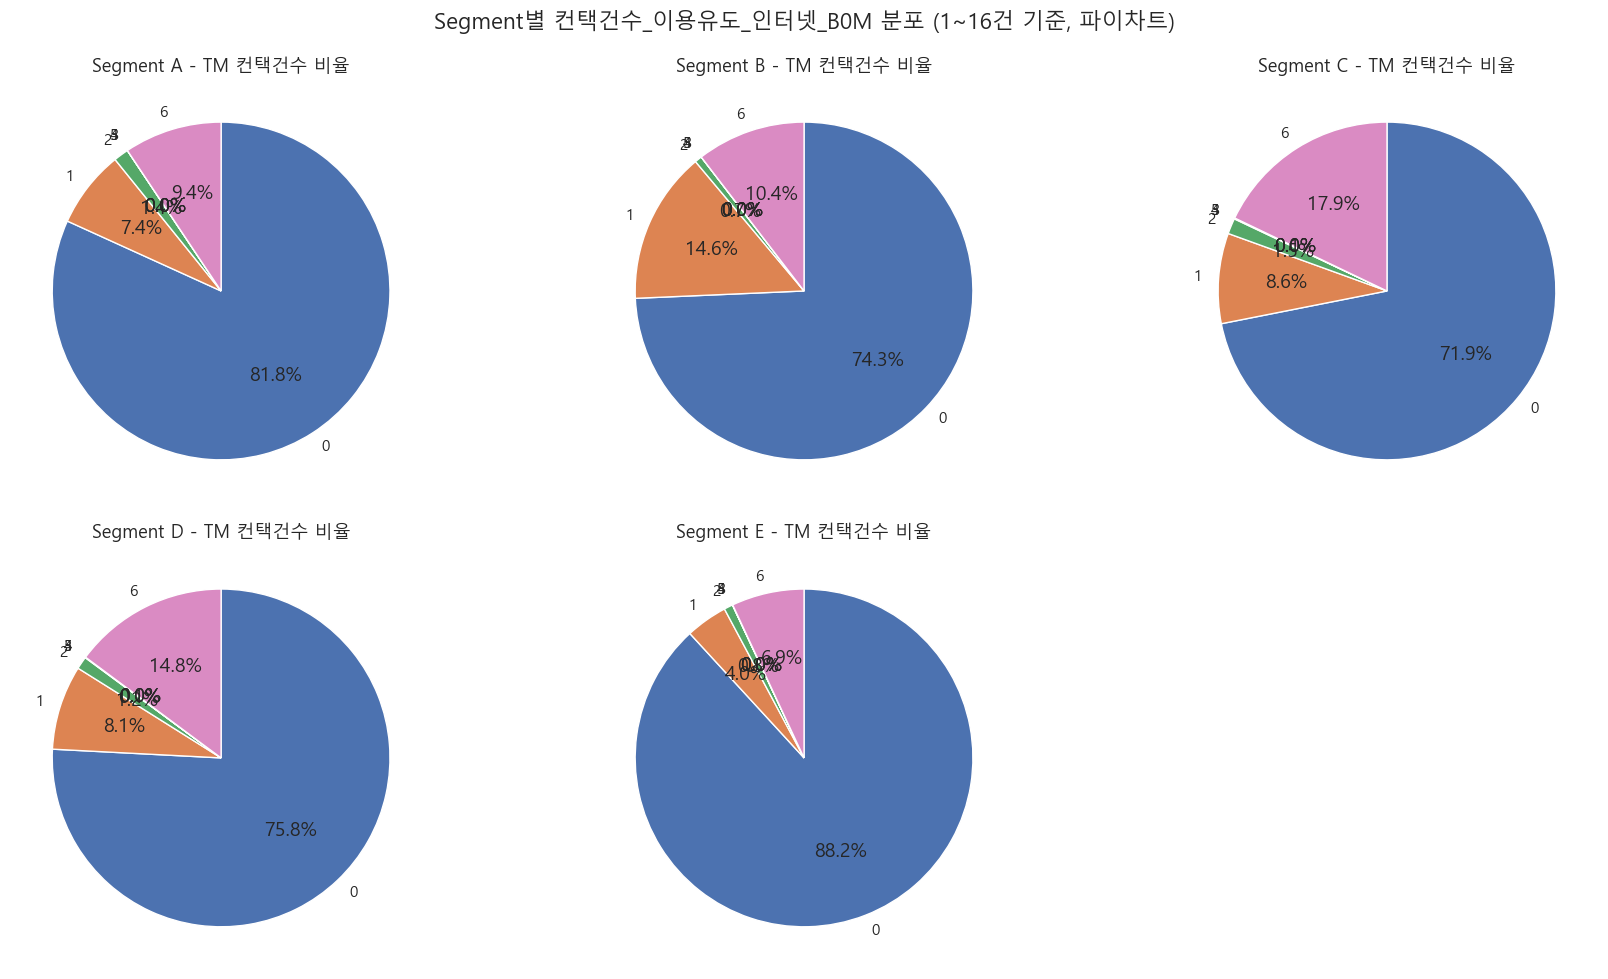

In [18]:
# 0건 제외한 1~16건 컬럼만 추출
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:63]

# 파이차트 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    data = tm_contact_ratio_range.loc[seg]
    axes[i].pie(
        data,
        labels=data.index.astype(str),
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg} - TM 컨택건수 비율", fontsize=13)

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 컨택건수_이용유도_인터넷_B0M 분포 (1~16건 기준, 파이차트)", fontsize=16)
plt.tight_layout()
plt.show()


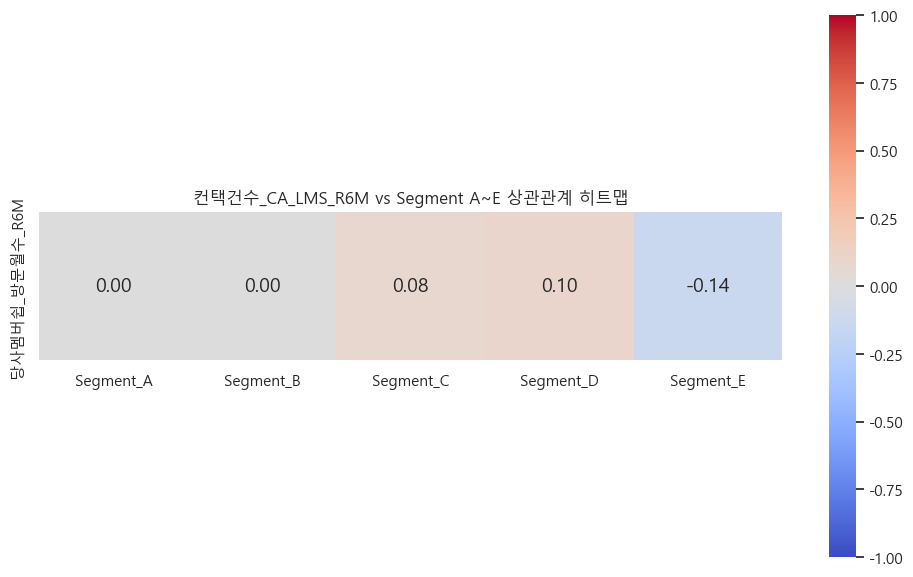

In [19]:
# 컨택건수_채권 관련 수치형 컬럼 리스트
bond_columns = [
    "당사멤버쉽_방문월수_R6M"
]

# Segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(df1["Segment"], prefix="Segment")

# 인코딩된 세그먼트와 홈페이지 컬럼만 추출
df_encoded = pd.concat([df1[bond_columns], segment_dummies], axis=1)

# 상관관계 계산
corr_matrix = df_encoded.corr()

# 히트맵 시각화 (홈페이지 컬럼 vs Segment 컬럼만 표시)
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix.loc[bond_columns, segment_dummies.columns],
    annot=True, cmap="coolwarm", fmt=".2f", square=True, vmax=1, vmin=-1
)
plt.title("컨택건수_CA_LMS_R6M vs Segment A~E 상관관계 히트맵")
plt.tight_layout()
plt.show()

## 📊 당사멤버쉽_방문월수_R6M - 세그먼트별 분석 결과

### ✅ 데이터 개요
- 최근 6개월 동안 **당사 멤버십 서비스에 방문한 월 수**를 기준으로 한 분포
- 값은 각 세그먼트 내 고객 중 해당 월수에 해당하는 **비율**
- 월 수: 0~6개월 (예: 3 → 최근 6개월 중 3개월 방문)

---

### 🔍 Segment별 특징 요약

| Segment | 0개월 방문 | 1개월 방문 | 6개월 방문 | 특징 요약 |
|---------|------------|-------------|-------------|------------|
| A       | 81.8%      | 7.4%        | 9.4%        | 방문 낮고 일부 고정고객 존재 |
| B       | 74.3%      | **14.6%**   | 10.4%       | 간헐적 방문 고객이 많음 |
| C       | 71.9%      | 8.6%        | **17.9%**   | 충성 고객 비율 가장 높음 |
| D       | 75.8%      | 8.1%        | 14.8%       | 전체적으로 고른 분포 |
| E       | **88.2%**  | 4.0%        | 6.9%        | 방문 거의 없음, 비이용 고객 다수 |

---

### 🧠 인사이트 및 전략 제안

- **Segment A**: 리텐션 캠페인 강화 → 소수 충성 고객 유지, 미방문자 전환 유도
- **Segment B**: 1회 방문자가 많음 → 재방문 유도 타겟
- **Segment C**: 충성 고객 중심 → VIP 마케팅 또는 혜택 강화 전략 적합
- **Segment D**: 완만한 분포 → 전환 + 유지 균형 전략 가능
- **Segment E**: 비방문 비율 압도적 → 멤버십 캠페인 강화 또는 다른 채널 집중



# 방문

In [22]:
# 분석 대상 컬럼
visit_columns_b0m = [
    "방문일수_PC_B0M",
    "방문일수_모바일웹_B0M",
    "방문일수_앱_B0M",
    "방문횟수_PC_B0M",
    "방문횟수_모바일웹_B0M",
    "방문횟수_앱_B0M"
]

# Segment A~E 고객만 필터링
df1_ab = df1[df1['Segment'].isin(['A', 'B', 'C', 'D', 'E'])]

# Segment별 평균 계산
ab_visit_mean_b0m = df1_ab.groupby("Segment")[visit_columns_b0m].mean().T

# 결과 출력
ab_visit_mean_b0m

Segment,A,B,C,D,E
방문일수_PC_B0M,1.00514,1.31250,0.75721,0.54196,0.22465
방문일수_모바일웹_B0M,0.00000,0.00000,0.00019,0.00032,0.00016
방문일수_앱_B0M,1.05761,3.25694,1.42542,1.33689,0.62253
방문횟수_PC_B0M,1.37140,1.81250,1.01675,0.73013,0.30364
방문횟수_모바일웹_B0M,0.00000,0.00000,0.00019,0.00035,0.00017
방문횟수_앱_B0M,1.36626,4.19444,1.80386,1.67411,0.76964


In [23]:
df1[df1['Segment'] == 'A']['방문일수_앱_B0M'].value_counts().sort_index()

방문일수_앱_B0M
0    728
1      1
2     40
3     96
4     26
5     14
6     25
7     15
8     13
9     14
Name: count, dtype: int64

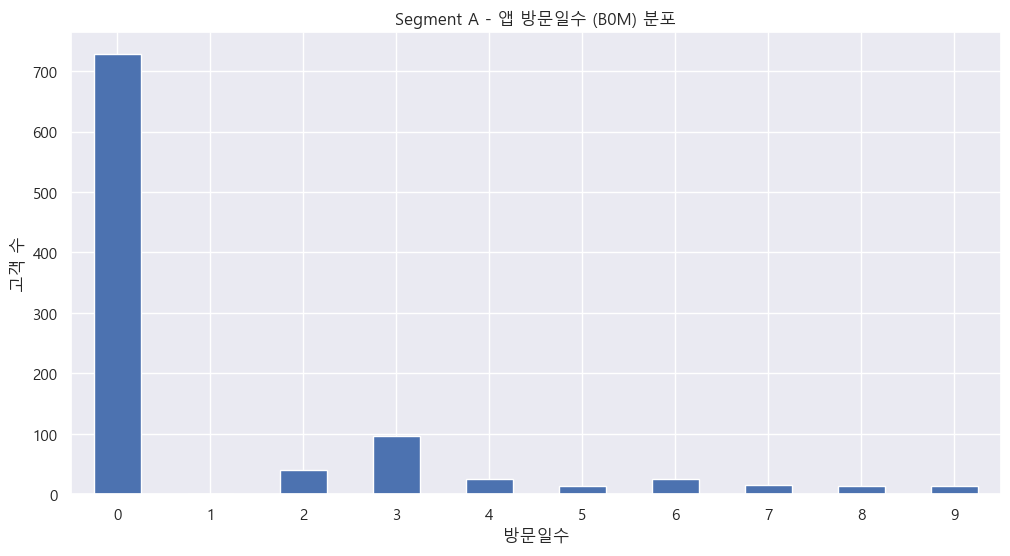

In [24]:
# 세그먼트 A의 방문일수 분포를 확인
df1[df1['Segment'] == 'A']['방문일수_앱_B0M'].value_counts().sort_index().plot(kind='bar')
plt.title("Segment A - 앱 방문일수 (B0M) 분포")
plt.xlabel("방문일수")
plt.ylabel("고객 수")
plt.xticks(rotation=0)
plt.show()

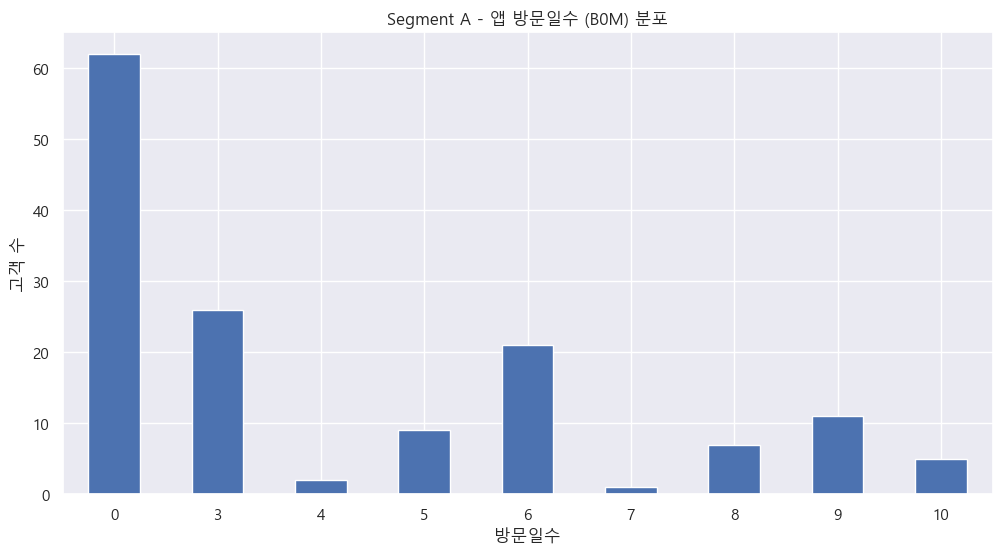

In [25]:
# 세그먼트 B의 방문일수 분포를 확인
df1[df1['Segment'] == 'B']['방문일수_앱_B0M'].value_counts().sort_index().plot(kind='bar')
plt.title("Segment A - 앱 방문일수 (B0M) 분포")
plt.xlabel("방문일수")
plt.ylabel("고객 수")
plt.xticks(rotation=0)
plt.show()

In [26]:
# 중앙값 확인
# 평균이 더 의미를 찾기 쉬워보인다.
# 하지만 중앙값에서도 B가 뚜렷하게 1위이다.
a = df1_ab[df1_ab["방문일수_앱_B0M"] > 0].groupby("Segment")["방문일수_앱_B0M"].median()
a

Segment
A   3.00000
B   6.00000
C   4.00000
D   4.00000
E   3.00000
Name: 방문일수_앱_B0M, dtype: float64

## 📊 채널 방문 행동 분석 (B0M 당월기준)

Segment A~E를 대상으로 PC, 모바일웹, 앱 채널의 **방문일수 및 방문횟수**(당월 기준) 평균을 비교한 결과:

---

### ✅ 주요 인사이트

- **Segment B가 전반적으로 가장 높은 채널 접속 활동성**을 보임
  - 앱 방문일수: 평균 3.26일
  - 앱 방문횟수: 평균 5.19회
  - PC 방문도 A보다 높음

- **Segment A는 앱/PC 방문에서는 준수한 활동성**
  - 앱 방문일수 1.06, 방문횟수 1.36 → 일반 고객 이상 수준
  - 모바일웹은 사실상 모든 세그먼트에서 의미 없음

- **Segment E는 전 채널에서 낮은 활동성을 보임**

---

### 🔍 결론

> Segment B는 디지털 채널, 특히 **앱 채널 중심의 활동성이 매우 높은 고객군**으로 파악됨.  
> Segment A는 **PC와 앱 채널을 적당히 사용하는 고객군**이며, 방문 수준은 평균 이상이지만 B처럼 뚜렷하진 않음.  
> 모바일웹 채널은 전반적으로 **분석에 활용하기 어려운 비활성 채널**로 보임.

In [28]:
pd.options.display.float_format = '{:.5f}'.format

# 1. 분석 대상 컬럼 리스트
visit_columns = [
    "방문일수_PC_B0M", "방문일수_모바일웹_B0M", "방문일수_앱_B0M",
    "방문횟수_PC_B0M", "방문횟수_모바일웹_B0M", "방문횟수_앱_B0M",
    "방문월수_PC_R6M", "방문월수_모바일웹_R6M", "방문월수_앱_R6M",
    "방문일수_모바일웹_R6M", "방문일수_앱_R6M", "방문횟수_모바일웹_R6M",
    "방문후경과월_PC_R6M", "방문후경과월_모바일웹_R6M", "방문후경과월_앱_R6M"
]

# 2. Segment 필터링
df1_seg = df1[df1["Segment"].isin(["A", "B", "C", "D", "E"])]

# 3. 평균값 계산
visit_columns_mean = df1_seg.groupby("Segment")[visit_columns].mean().T

# 4. B0M, R6M 컬럼명 분리 (이건 리스트임)
visit_columns_B0M = [col for col in visit_columns if "_B0M" in col]
visit_columns_R6M = [col for col in visit_columns if "_R6M" in col]

# 5. 평균값 DataFrame에서 해당 컬럼만 출력
display(visit_columns_mean.loc[visit_columns_B0M])
display(visit_columns_mean.loc[visit_columns_R6M])

Segment,A,B,C,D,E
방문일수_PC_B0M,1.00514,1.31250,0.75721,0.54196,0.22465
방문일수_모바일웹_B0M,0.00000,0.00000,0.00019,0.00032,0.00016
방문일수_앱_B0M,1.05761,3.25694,1.42542,1.33689,0.62253
방문횟수_PC_B0M,1.37140,1.81250,1.01675,0.73013,0.30364
방문횟수_모바일웹_B0M,0.00000,0.00000,0.00019,0.00035,0.00017
방문횟수_앱_B0M,1.36626,4.19444,1.80386,1.67411,0.76964


Segment,A,B,C,D,E
방문월수_PC_R6M,1.60082,2.06944,1.18299,0.85863,0.35995
방문월수_모바일웹_R6M,0.05556,0.04167,0.04642,0.04106,0.01675
방문월수_앱_R6M,1.44444,3.30556,1.80397,1.72387,0.87559
방문일수_모바일웹_R6M,0.19342,0.10417,0.15373,0.13659,0.05581
방문일수_앱_R6M,5.26029,18.18056,7.42965,6.92034,3.08950
방문횟수_모바일웹_R6M,0.22942,0.13889,0.18004,0.15913,0.06454
방문후경과월_PC_R6M,3.81276,3.50000,4.55668,4.92610,5.53931
방문후경과월_모바일웹_R6M,5.89095,5.99306,5.93042,5.94082,5.97366
방문후경과월_앱_R6M,4.21399,2.18056,3.89984,4.00949,4.96970


### 두번째 분석 07.02 개별확인 컬럼이름만 바꿔넣어주기

In [30]:
df1['방문후경과월_앱_R6M'].value_counts().sort_index()

방문후경과월_앱_R6M
0     442067
1      24231
2      16937
3      18166
4      17294
5      15308
6    1865997
Name: count, dtype: int64

In [31]:
# 세그먼트별 '컬럼' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["방문후경과월_앱_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)

# 결과 출력
display(tm_contact_dist)

# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)
display(tm_contact_ratio)

방문후경과월_앱_R6M,0,1,2,3,4,5,6
Segment,,,,,,,
A,250,21,16,14,9,7,655
B,86,3,2,2,2,1,48
C,40293,2341,1543,1499,1336,1155,79423
D,105438,5332,3660,3751,3481,3027,224553
E,296000,16534,11716,12900,12466,11118,1561318


방문후경과월_앱_R6M,0,1,2,3,4,5,6
Segment,,,,,,,
A,0.25720,0.02160,0.01646,0.01440,0.00926,0.00720,0.67387
B,0.59722,0.02083,0.01389,0.01389,0.01389,0.00694,0.33333
C,0.31580,0.01835,0.01209,0.01175,0.01047,0.00905,0.62249
D,0.30191,0.01527,0.01048,0.01074,0.00997,0.00867,0.64297
E,0.15400,0.00860,0.00610,0.00671,0.00649,0.00578,0.81232


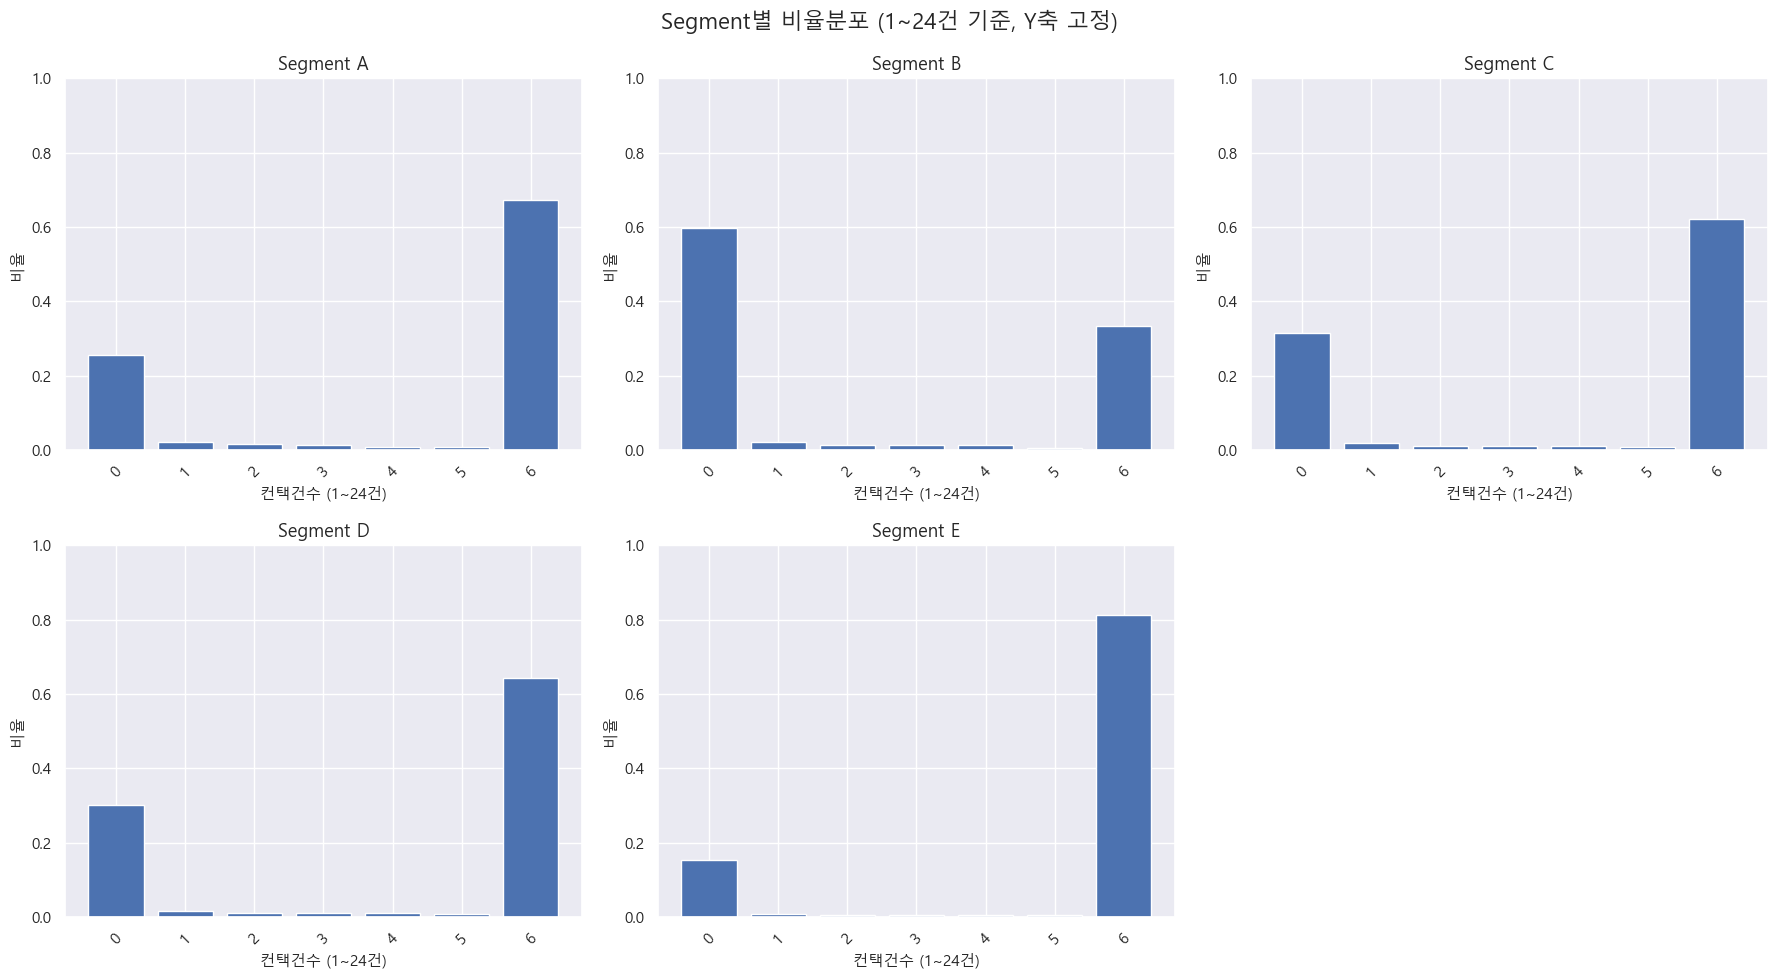

In [32]:
# 보고 싶은 범위 설정하면됨
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:63]

# 막대그래프 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    axes[i].bar(tm_contact_ratio_range.columns.astype(str), tm_contact_ratio_range.loc[seg])
    axes[i].set_title(f"Segment {seg}", fontsize=13)
    axes[i].set_xlabel("컨택건수 (1~24건)", fontsize=11)
    axes[i].set_ylabel("비율", fontsize=11)
    axes[i].set_ylim(0, 1)  # Y축 고정
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, axis='y')

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 비율분포 (1~24건 기준, Y축 고정)", fontsize=16)
plt.tight_layout()
plt.show()

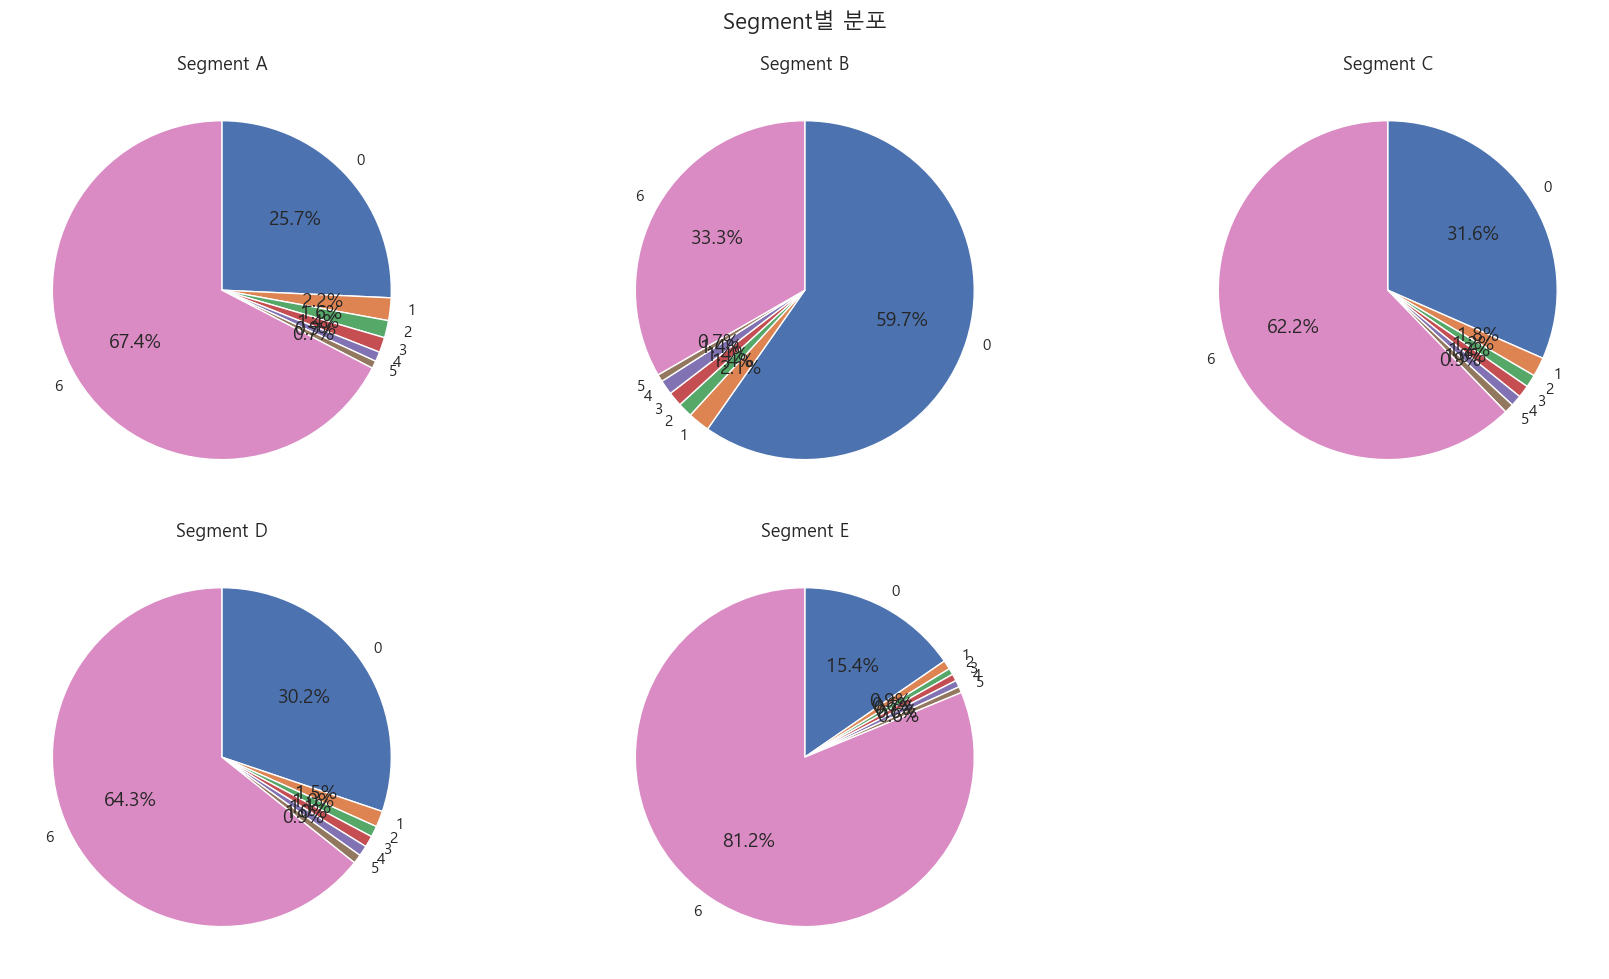

In [33]:
# 0건 제외한 1~16건 컬럼만 추출
tm_contact_ratio_range = tm_contact_ratio.loc[:, 0:63]

# 파이차트 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

segments = tm_contact_ratio_range.index.tolist()

for i, seg in enumerate(segments):
    data = tm_contact_ratio_range.loc[seg]
    axes[i].pie(
        data,
        labels=data.index.astype(str),
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg}", fontsize=13)

# 빈 subplot 제거 (6번째)
fig.delaxes(axes[-1])

# 전체 타이틀
fig.suptitle("Segment별 분포", fontsize=16)
plt.tight_layout()
plt.show()

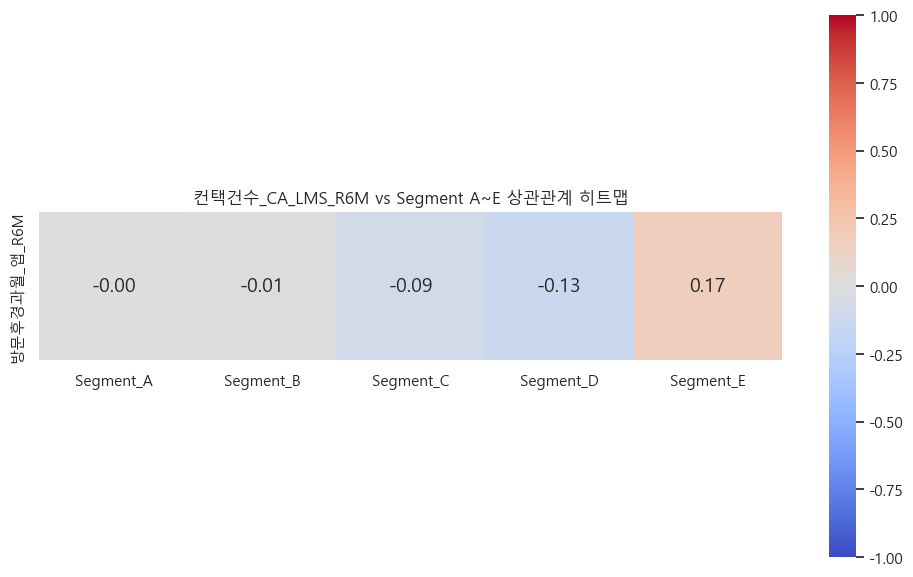

In [34]:
# 상관계수 구하기
bond_columns = [
    "방문후경과월_앱_R6M"
]

# Segment를 원-핫 인코딩
segment_dummies = pd.get_dummies(df1["Segment"], prefix="Segment")

# 인코딩된 세그먼트와 홈페이지 컬럼만 추출
df_encoded = pd.concat([df1[bond_columns], segment_dummies], axis=1)

# 상관관계 계산
corr_matrix = df_encoded.corr()

# 히트맵 시각화 (홈페이지 컬럼 vs Segment 컬럼만 표시)
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix.loc[bond_columns, segment_dummies.columns],
    annot=True, cmap="coolwarm", fmt=".2f", square=True, vmax=1, vmin=-1
)
plt.title("컨택건수_CA_LMS_R6M vs Segment A~E 상관관계 히트맵")
plt.tight_layout()
plt.show()

## 결과모음 - 살릴컬럼

## 1. 💻 방문월수_PC_R6M - 세그먼트별 분석 결과

### ✅ 데이터 개요
- 최근 6개월간 PC 채널 방문 여부를 **월 단위(0~6개월)**로 구분한 분포
- 각 세그먼트별 고객이 **PC 채널에 몇 개월 방문했는지**를 보여줌

---

### 🔍 Segment별 요약

| Segment | 0개월 방문 | 1개월 방문 | 6개월 방문 | 주요 특징 |
|---------|-------------|-------------|-------------|------------|
| A       | 52.9%       | 24.1%       | 22.5%       | 고르게 분포된 중간 활동군 |
| B       | 49.3%       | 19.4%       | **31.3%**   | **가장 높은 6개월 방문 비율** |
| C       | 68.3%       | 14.3%       | 17.3%       | 고정 사용자 일부 있으나 비방문 다수 |
| D       | 75.6%       | 12.1%       | 12.3%       | 대부분 미사용자, 저활동군 |
| E       | **89.1%**   | 5.8%        | 5.0%        | **PC 거의 사용하지 않음** |

---

### 🧠 전략적 해석

- **Segment B**  
  → 6개월 연속 방문자 비율 31.3%로 최고  
  → **충성도 높은 PC 사용자** → 프로모션 타겟 우선군

- **Segment A**  
  → 고르게 분포 (0, 1, 6개월 분포 모두 있음)  
  → **PC 채널 반응층이 다양** → 타겟 세분화 전략 적합

- **Segment C**  
  → 과반이 0개월 방문, 일부 충성 사용자 존재  
  → **중간 수준** → 리텐션 실험군으로 적합

- **Segment D**  
  → **미사용자 비율 높음** (76%)  
  → **모바일 중심 전략** 필요

- **Segment E**  
  → **압도적으로 PC 비이용자**  
  → **PC 채널 제외 고려**, 앱/모바일 우선 운영

---

### 📌 결론 요약
> Segment B는 PC 채널에서 가장 충성도 높은 고객군이며,  
> Segment E는 거의 PC 채널을 사용하지 않는 비우선 그룹으로 분류할 수 있다.  
> Segment A는 다양한 접촉 수준이 존재하므로 **세부 타겟팅 실험군**으로 활용 가능하다.


## 2. 📱 방문월수_앱_R6M - 세그먼트별 분석 결과

### ✅ 데이터 개요
- 최근 6개월간 **앱(App)** 채널에 방문한 월 수 (0~6개월)의 분포
- 각 Segment별로 고객의 **앱 채널 방문 빈도**를 보여줌

---

### 🔍 Segment별 요약

| Segment | 0개월 방문 | 1개월 방문 | 6개월 방문 | 주요 특징 |
|---------|-------------|-------------|-------------|------------|
| A       | 66.8%       | 7.9%        | 15.0%       | 일반적인 활동 그룹 |
| B       | 34.0%       | 9.0%        | **43.8%**   | **앱 충성도 최상위 그룹** |
| C       | 60.8%       | 8.3%        | 21.9%       | 활동성 중상, 고빈도 고객 다수 |
| D       | 62.9%       | 7.8%        | 20.9%       | C와 유사한 패턴 |
| E       | **80.2%**   | 4.7%        | **9.9%**    | **앱 비이용자 중심**, 충성 고객 거의 없음

---

### 🧠 전략적 해석

- **Segment B**
  - 6개월 연속 방문 비율 **43.8%** → **가장 충성도 높은 앱 이용자**
  - **앱 전용 프로모션, 푸시 알림 전략 핵심 타겟**

- **Segment C & D**
  - 6개월 방문 비율 21~22% 수준 → **고정 이용자 존재**
  - **리텐션 캠페인 or 고빈도 혜택 유도에 적합**

- **Segment A**
  - 0개월 비율은 다소 높지만 6개월 방문도 15%  
  - **중간 수준** → 세부 타겟화 가능

- **Segment E**
  - 0개월 방문 비율 **80.2%**, 6개월 방문 **9.9%**  
  - **앱 비우선 그룹** → 앱 중심 전략 대상 제외 고려

---

### 📌 결론 요약
> Segment B는 앱을 가장 충성도 있게 사용하는 고객군으로,  
앱 기반 마케팅 전략의 **우선 타겟**이 되어야 한다.  
반면 Segment E는 앱 채널의 접근이 제한적인 그룹으로,  
**타 채널(웹, TM 등) 중심의 전략이 유효할 것으로 판단된다.**


## 3. 💻 방문일수_PC_B0M - 세그먼트별 분석 결과

### ✅ 데이터 개요
- 기준월(B0M) 동안 **PC 웹사이트에 방문한 일수(0~6일)**에 대한 고객 비율
- 각 Segment별로 **PC 채널 이용 빈도**를 나타냄

---

### 🔍 Segment별 요약

| Segment | 0일 방문 비율 | 4일 이상 비율 합계 | 주요 특징 |
|---------|----------------|---------------------|------------|
| A       | 75.0%          | 21.9%               | 자주 방문하는 고객 다수, **중상위 활동군** |
| B       | 68.1%          | **29.2%**           | **가장 많은 고빈도 이용자**, 핵심 디지털 그룹 |
| C       | 81.9%          | 17.6%               | 일부 충성 이용자 포함된 **중간 그룹** |
| D       | 87.2%          | 12.4%               | PC 이용 적음, **저활동군** |
| E       | **94.8%**      | **5.2%**            | **PC 채널 거의 미이용**, 타 채널 위주 필요 |

---

### 🧠 전략적 제안

- **Segment A**: 중간 이상 PC 활동 → 웹 기반 콘텐츠 유지 및 리타겟팅
- **Segment B**: **우선 디지털 타겟팅 대상**, PC 기반 프로모션/추천 강화
- **Segment C**: 실험군/리텐션 관리 적합
- **Segment D**: 모바일 중심 유입 유도 고려
- **Segment E**: **PC 채널 제외 고려**, 앱/모바일 중심 채널 운영 필요

---

### 📌 결론
> Segment B는 **PC 채널 중심의 충성고객**이 가장 많으며,  
> Segment E는 PC를 거의 사용하지 않는 **비우선 채널군**으로 구분 가능하다.


## 4. 💻 방문일수_PC_R6M - 세그먼트별 누적 방문일수 비율 분석

### ✅ 데이터 개요
- 최근 6개월 기준, **PC 채널에 방문한 누적 일수**에 따라
  - 1일 이상
  - 10일 이상
  - 20일 이상
  - 30일 이상
- 각 세그먼트별로 **PC 채널 반복 이용 강도**를 비교 가능

---

### 🔍 Segment별 요약

| Segment | 1일 이상 | 10일 이상 | 20일 이상 | 30일 이상 | 특징 요약 |
|---------|-----------|------------|-------------|-------------|-------------|
| A       | 77.8%     | 15.0%      | 7.0%        | 0.20%        | 중간 수준, 반복 사용자도 다수 |
| B       | 69.4%     | 14.6%      | **15.9%**   | 0.00%        | **1회 이상 사용자는 적지만, 집중 사용자 비율은 높음** |
| C       | 82.7%     | 10.8%      | 6.4%        | 0.16%        | 넓은 도달률, 반복성은 낮음 |
| D       | **87.7%** | 7.8%       | 4.3%        | 0.13%        | 가장 넓은 도달률, 다만 반복성 낮음 |
| E       | **94.9%** | **3.2%**   | 1.8%        | 0.07%        | 대부분 소량 사용자, **반복성 매우 낮음**

---

### 🧠 인사이트 요약

- **Segment B**
  - 1회 이상은 69%로 낮지만, 10회 이상·20회 이상 비율이 가장 높음
  - 👉 **적지만 강한 사용자층이 존재하는 세그먼트**
  - 전략: **충성 사용자 유지/혜택 강화**, 프리미엄 정보 노출

- **Segment E**
  - 거의 모든 고객이 1일 이상 사용했지만, **반복성 매우 낮음**
  - 👉 **가벼운 접속자 중심**, 반복 전략보다는 **재방문 유도 중심 전략** 적합

- **Segment A**
  - 고르게 분포, 전체 중간 수준
  - 👉 범용적 타겟 → **실험군, 균형 전략 적합**

- **Segment D**
  - 도달률은 높지만 고빈도 사용자는 매우 적음
  - 👉 **전환율 낮은 대량 유입형** → 리타겟팅 강화 필요

---

### 📌 결론 요약

> Segment **B**는 전체 고객 수는 적을 수 있지만,  
> **반복적으로 깊게 사용하는 고가치 고객**이 많아  
> **VIP 타겟 마케팅**에 적합하다.  
> 반면 Segment **E**는 넓게 퍼졌지만 **사용 깊이가 얕아**,  
> **단기 리마인드 캠페인** 중심으로 접근하는 것이 효과적이다.


## 5. 📱 방문일수_앱_B0M - 세그먼트별 분석 결과

### ✅ 데이터 개요
- 기준월(B0M, 이번 달) 동안 앱(App) 채널에 **방문한 일수(0~11일)**에 대한 고객 비율
- 각 세그먼트별로 앱 사용의 **빈도와 집중도**를 보여줌

---

### 🔍 Segment별 요약

| Segment | 0일 방문 비율 | 3일 이상 방문 비율 | 최대 방문 일수 | 주요 특징 |
|---------|----------------|----------------------|----------------|-------------|
| A       | 74.9%          | 28.6% (3일 이상 합산) | 9일            | 중간 수준, 분산형 분포 |
| B       | **43.1%**      | **56.9%**             | 10일           | **가장 적극적인 사용자** |
| C       | 69.3%          | 30.7%                 | 11일           | 중상 수준 |
| D       | 70.6%          | 29.4%                 | 11일           | C와 유사 |
| E       | **85.1%**      | 14.9%                 | 11일           | **앱 비사용자 다수** |

---

### 🧠 전략적 해석

- **Segment B**
  - 단 43%만 앱을 사용하지 않았고, 3일 이상 사용한 비율이 전체의 절반 이상
  - **가장 적극적으로 앱을 사용하는 핵심 디지털 그룹**
  - 👉 **푸시 알림, 앱 전용 쿠폰, 자주 방문 유도 전략 최적 대상**

- **Segment A**
  - 0일 방문은 높지만, 1~4일 사이 분산된 활동 보임
  - 👉 **불규칙 사용자**, 리텐션 유도 또는 재방문 유도 대상

- **Segment C & D**
  - 중간 수준의 활동 → 일부 고빈도 사용자 존재
  - 👉 리타겟팅, 혜택 기반 리텐션 전략 적합

- **Segment E**
  - **가장 높은 0일 방문 비율(85%)**
  - 👉 **앱 이용 유도 필요 또는 제외 고려**, 다른 채널 우선 전략

---

### 📌 결론 요약
> Segment **B**는 이번 달 기준으로도 **앱을 자주 사용하는 고객 비율이 가장 높아**,  
**모바일 마케팅의 최우선 타겟**이 될 수 있다.  
반면 Segment **E**는 앱 이용률이 가장 낮은 그룹으로,  
**타 채널(웹, TM 등) 중심 전략**이 더 적합하다.


## 6. 📱 방문일수_앱_R6M - 세그먼트별 분석 결과

### ✅ 데이터 개요
- 최근 6개월간 **앱에 실제 접속한 일수(0~61일)** 기준 비율 분포
- Segment별로 앱 사용의 **빈도와 누적 방문성** 분석
- 시각화는 파이차트로 각 Segment별 분포 확인 가능

---

### 🔍 Segment별 주요 수치 요약

| Segment | 0일 방문 비율 | 특징 요약 |
|---------|----------------|-----------|
| A       | 67.2%          | **평균적 분포**, 일부 고빈도 사용자 존재 |
| B       | **34.7%**      | **압도적으로 고빈도 사용자 비율 높음**, 방문 분포가 넓게 퍼짐 |
| C       | 61.3%          | A와 유사, 일부 고빈도 사용자 있음 |
| D       | 63.4%          | 전반적으로 활동 낮음, 분포 편중 |
| E       | **80.7%**      | 앱을 거의 사용하지 않는 비활동군 |

---

### 🧠 인사이트 요약

- **Segment B**
  - 0일 비율이 **34.7%**로 매우 낮고, 나머지 구간이 폭넓게 분포
  - ➤ **고빈도 앱 사용자 비율이 매우 높은 핵심 모바일 타겟**
  - 파이차트에서도 다양한 방문일수 구간이 큰 비중을 차지함
  - 👉 **앱 기반 이벤트, 푸시 알림, 리텐션 마케팅 최우선 타겟**

- **Segment A / C / D**
  - 0일 비율이 60~67% 수준으로 유사
  - 일부 사용자만 활동성 보이며 나머지는 장기 미사용
  - 👉 **리텐션 유도 대상**으로 활용 가능

- **Segment E**
  - 0일 비율 **80.7%**로 **앱 비이용자가 절대 다수**
  - 👉 **앱 전략 제외 고려**, 다른 채널 (웹, TM 등) 우선

---

### 📌 결론

> Segment B는 **고빈도 앱 이용자 비중이 가장 높은 유일한 세그먼트**이며,  
> 앱 기반 전략의 **핵심 우선 타겟**으로 활용해야 한다.  
> 반대로 Segment E는 앱에 대한 반응도가 매우 낮아,  
> **모바일 앱 중심 전략에서 제외하고 다른 접점 채널을 활용하는 것이 적절**하다.


## 7. 💻 방문횟수_PC_B0M - 세그먼트별 분석 결과

### ✅ 데이터 개요
- 기준월(B0M, 이번 달) 동안 **PC 채널에 접속한 총 횟수(0~9회)**를 Segment별로 비율화
- 고객의 **PC 채널 사용 빈도**를 정량적으로 파악 가능

---

### 🔍 Segment별 요약

| Segment | 0회 비율 | 4~6회 합계 | 최대 빈도 구간 | 주요 특징 |
|---------|----------|-------------|----------------|-------------|
| A       | 74.6%    | 31.1%        | 4~5회          | 다소 활발한 PC 접속층 존재 |
| B       | 68.1%    | **40.7%**    | 5~6회          | **가장 높은 반복 이용자 비중** |
| C       | 81.9%    | 17.0%        | 5~6회          | 고빈도 접속 소수 포함 |
| D       | 87.1%    | 12.3%        | 5~6회          | 비접속자가 대부분 |
| E       | **94.8%**| 4.8%         | 4~5회          | PC 채널 거의 미사용

---

### 🧠 전략적 해석

- **Segment B**
  - 0회 접속자 비율이 68.1%로 낮고, **5~6회 접속 비율이 27.6%**
  - ➤ **PC 채널을 자주 활용하는 충성 사용자군**
  - 👉 웹 중심 캠페인, 배너 노출, 리마케팅에 최적

- **Segment A**
  - 약 25%가 1회 이상 방문, **4~5회 구간에서 비율 집중**
  - 👉 리타겟팅/리텐션 유도 가능성 높음

- **Segment C/D**
  - 대다수가 0회지만 일부 반복 사용자 존재
  - 👉 실험군 또는 유지 전략 대상

- **Segment E**
  - **95%가 접속하지 않음**
  - 👉 **PC 채널 대상 제외 고려**, 앱/모바일 중심 전략 필요

---

### 📌 결론 요약
> Segment B는 PC 채널을 반복적으로 활용하는 **우수 디지털 이용자**로,  
웹 기반 마케팅 및 정보 노출 전략의 **핵심 타겟**이 될 수 있다.  
Segment E는 PC 접속률이 현저히 낮기 때문에,  
**PC 중심 전략보다는 모바일, 앱 등 대체 채널을 고려하는 것이 효과적이다.**


### 8. 📌 방문횟수_PC_R6M 세그먼트별 분포 해석 (최근 6개월 기준)

### 📊 Segment별 방문횟수_PC_R6M 요약 비교 (10회 이상 반복사용층 기준)

| Segment | 접근률 (1회 이상) | 반복사용층 (10회 이상~40회 이상 합계) | 주요 특징                             |
|---------|------------------|--------------------------------------|---------------------------------------|
| A       | 75.0%            | **26.1%**                             | 중복방문 사용자 비중이 가장 높음     |
| B       | 66.7%            | **31.4%**                             | 반복사용층 비율 가장 높음 |
| C       | 81.2%            | **20.4%**                             | 넓고 얕은 참여                        |
| D       | 86.5%            | **18.4%**                             | 접근률은 높지만 반복은 낮은 편       |
| E       | 94.4%            | **5.7%**                              | 대부분 단발 사용자, 충성도 낮음      |

---

### 🧩 종합 인사이트

- 대부분의 고객은 **1~9회 수준에서 PC방문이 이루어짐**, 특히 E세그먼트는 1회 이상이 94.4%로 가장 높음 → **넓고 얕은 참여형**.
- 반면 B세그먼트는 **심화 방문 고객 비율(20~40회 이상)이 유의미하게 높음** → **집중적인 사용 고객층** 보유 가능성.
- **A, C, D세그먼트**는 중간 수준에서 분포, 일부 심화 사용자도 존재하지만 비율은 제한적.

---

### 💡 활용 아이디어

- **E세그먼트**: 접근성은 좋으나, 빈도는 낮은 경향 → **재방문 유도 캠페인**이 효과적일 수 있음.
- **B세그먼트**: 충성도 높은 고객으로 추정 → **프리미엄 혜택 제안**, 업셀링 전략 가능.
- **A세그먼트**: 평균적 성향, 반응 기반 세분화 마케팅 시도 가능.



## 9. 📱 방문횟수_앱_B0M - 세그먼트별 분석 결과

### ✅ 데이터 개요
- 기준월(B0M) 기준으로 **앱(App) 채널에 방문한 횟수(0~16회)**를 Segment별로 비율화
- 고객의 **앱 접속 반복도**를 나타냄

---

### 🔍 Segment별 요약

| Segment | 0회 방문 비율 | 5회 이상 방문 비율 (합계) | 특징 요약 |
|---------|----------------|----------------------------|------------|
| A       | 75.1%          | 약 12.7%                   | 대부분 미접속자, **소수 반복 사용자 존재** |
| B       | **43.1%**      | **약 36.1%**               | **가장 활발한 앱 사용자**, 반복 접속자 다수 |
| C       | 69.3%          | 약 25.7%                   | 중간 수준, 일부 고빈도 접속자 포함 |
| D       | 70.6%          | 약 25.5%                   | C와 유사, 활동도 안정적 |
| E       | **85.1%**      | 약 13.0%                   | 대부분 비활동자, **일부 가벼운 사용자만 존재**

---

### 🧠 전략적 해석

- **Segment B**
  - 앱을 5회 이상 접속한 고객 비율이 36.1% → **단연 최상위**
  - 👉 **앱 중심 마케팅, 리텐션 전략의 최우선 타겟**
  - 👉 푸시알림, 앱 전용 이벤트 등 적극 적용 가능

- **Segment A**
  - 75% 이상이 앱을 아예 접속하지 않음
  - 👉 비이용자 중심 세그먼트, 앱 유도 캠페인 필요

- **Segment C / D**
  - 25% 내외 고빈도 사용자 존재
  - 👉 세부 타겟팅을 통한 리마케팅 또는 충성 고객 관리 가능

- **Segment E**
  - 비이용자 비율 **가장 높음(85%)**
  - 👉 앱 채널 전략에서 제외 고려 or 타 채널 중심 전략 필요

---

### 📌 결론 요약

> Segment **B**는 **가장 활발하고 반복적인 앱 사용자층**으로,  
앱 기반 전략의 **핵심 우선 타겟**이다.  
Segment **E**는 앱 사용률이 낮고 접속도 거의 없기 때문에,  
**앱 중심 전략에서는 비효율적인 세그먼트**로 분류 가능하다.


## 10. 📱 방문횟수_앱_R6M 세그먼트별 요약 비교

- ✅ 기준:
  - **접근률**: 1회 이상 방문한 고객 비율
  - **반복사용층**: 10회 이상~80회 이상 구간의 비율 합

| Segment | 접근률 (1회 이상) | 반복사용층 (10회 이상~80회 이상) | 주요 특징 요약                                   |
|---------|------------------|----------------------------------|--------------------------------------------------|
| A       | 83.1%            | **21.2%**                         | 적당히 사용            |
| B       | 50.0%            | **49.1%**                         | 앱 사용자 중 절반이 헤비유저 |
| C       | 76.0%            | **30.4%**                         | 균형적. 반복사용층도 안정적으로 존재함     |
| D       | 77.3%            | **28.1%**                         | 고른 분포를 보이며 비교적 충성 고객 분포 균형적 |
| E       | 89.2%            | **11.2%**                         | 반복사용층은 낮은 단발성 경향 |

## 11.💻 방문후경과월_PC_R6M - 세그먼트별 분석 결과

### ✅ 데이터 개요
- 최근 6개월 기준, **PC 채널 마지막 방문 후 경과된 개월 수**
- 값이 작을수록 **최근 방문자**, 클수록 **오랫동안 미접속자**
- 각 Segment별로 **PC 채널 이탈 속도/활성도**를 간접적으로 평가 가능

---

### 🔍 Segment별 요약

| Segment | 0개월 (최근 접속) | 6개월 (장기 미접속) | 주요 특징 |
|---------|--------------------|----------------------|-------------|
| A       | 27.7%              | 55.5%                | 활동 중간, 최근 접속자도 일부 있음 |
| B       | 34.0%              | 50.0%                | 비교적 **최근 접속자 많음**, 반면 장기 이탈자도 존재 |
| C       | 19.2%              | 70.7%                | 활동성 낮음, **장기 미접속 다수** |
| D       | 13.8%              | 77.6%                | 매우 낮은 유지율, **PC 이탈 가속** |
| E       | **5.7%**           | **90.1%**            | **사실상 PC 채널 이탈 그룹**

---

### 🧠 전략적 해석

- **Segment A / B**
  - 약 30%는 최근 접속한 고객
  - 👉 **리텐션 대상**, 재활성화 가능성 존재
  - 특히 B는 **0개월 접속 비율이 가장 높음**

- **Segment C**
  - 최근 접속자는 19%, 6개월 이상 미접속자가 71%
  - 👉 **이탈 중간 단계**, 재유입 유도 가능

- **Segment D**
  - 최근 접속자 14%, 장기 이탈자 78%
  - 👉 **PC 중심 전략 효과 적음**, 다른 채널 권장

- **Segment E**
  - 90% 이상이 6개월 이상 접속 없음
  - 👉 **PC 채널 전략에서 제외 고려**, 앱/모바일 집중 필요

---

### 📌 결론 요약

> Segment **B**는 최근 접속 고객 비율이 가장 높고,  
> **PC 채널 리텐션/재방문 유도 전략**이 효과적일 가능성이 크다.  
> 반면 Segment **E**는 장기 미접속 비율이 90%에 달해,  
> **PC 채널 전략에서 제외하고 타 채널 중심 전략이 필요**하다.


## 12. 📱 방문후경과월_앱_R6M - 세그먼트별 분석 결과

### ✅ 데이터 개요
- 최근 6개월 기준, **앱(App) 채널 마지막 방문 이후 경과 개월 수**
- 값이 0에 가까울수록 최근 접속, 6에 가까울수록 **장기 미접속자**
- 각 Segment별 **앱 사용의 지속성 or 이탈 수준**을 평가할 수 있는 지표

---

### 🔍 Segment별 요약

| Segment | 0개월 (최근 접속) | 6개월 (장기 미접속) | 특징 요약 |
|---------|--------------------|----------------------|-------------|
| A       | 25.7%              | 67.4%                | 중간 수준 유지, 최근 이용자도 다수 |
| B       | **59.7%**          | 33.3%                | **가장 최근에 접속한 고객 비율 높음** |
| C       | 31.6%              | 62.2%                | 최근 접속은 있지만 장기 이탈자도 많음 |
| D       | 30.2%              | 64.3%                | C와 유사한 구조 |
| E       | 15.4%              | **81.2%**            | **앱 장기 미접속 비율 최상위**, 이탈 심각

---

### 🧠 전략적 해석

- **Segment B**
  - 최근 접속(0개월) 비율이 **59.7%**로 최고
  - 👉 **지속적인 앱 활동 고객이 가장 많은 세그먼트**
  - 👉 푸시알림, 앱 이벤트, 전용 혜택 운영에 최적

- **Segment A**
  - 최근 접속자와 장기 이탈자가 균형된 중간 그룹
  - 👉 리텐션 유도/이탈 방지 전략 실험군

- **Segment C/D**
  - 약 30%는 최근 접속했지만, 절반 이상이 이탈 상태
  - 👉 일부 유지되고 있으나 재유입/유지 전략 필요

- **Segment E**
  - **81.2%가 6개월간 앱 미접속** → **이탈 심각**
  - 👉 앱 중심 전략에서 제외 고려, 다른 채널로 유도 필요

---

### 📌 결론 요약

> Segment **B**는 앱 접속을 최근까지 유지하고 있는 **핵심 앱 사용자군**으로,  
> **모바일 기반 마케팅과 유지 전략의 최우선 타겟**이다.  
> 반면 Segment **E**는 앱 이탈 비율이 매우 높아,  
> **앱 기반 전략에서 제외하고 다른 채널 중심 전략으로 전환**하는 것이 적절하다.


### 인덱스가 문자형인 컬럼 리스트

In [49]:

suspect_columns = [
    "방문일수_PC_R6M",
    "방문횟수_PC_R6M",
    "방문횟수_앱_R6M",
]

# 각 컬럼별 고유값 출력
for col in suspect_columns:
    print(f"\n[ {col} ]")
    print(df1[col].value_counts(dropna=False))


[ 방문일수_PC_R6M ]
방문일수_PC_R6M
1회 이상     2236992
10회 이상     102991
20회 이상      57986
30회 이상       2031
Name: count, dtype: int64

[ 방문횟수_PC_R6M ]
방문횟수_PC_R6M
1회 이상     2221841
20회 이상      77377
10회 이상      67199
30회 이상      32730
40회 이상        853
Name: count, dtype: int64

[ 방문횟수_앱_R6M ]
방문횟수_앱_R6M
1회 이상     2082674
10회 이상      93648
20회 이상      63543
30회 이상      53407
40회 이상      44356
50회 이상      31544
60회 이상      22343
70회 이상       8170
80회 이상        315
Name: count, dtype: int64


In [97]:
# 확인할 컬럼 리스트
cols = ["방문일수_PC_R6M", "방문횟수_PC_R6M", "방문횟수_앱_R6M"]

# 결측치 개수 및 비율 계산
missing_info = pd.DataFrame({
    "결측값 개수": df1[cols].isnull().sum(),
    "결측값 비율": df1[cols].isnull().mean()
})

# 출력
display(missing_info)

,결측값 개수,결측값 비율
방문일수_PC_R6M,0,0.00000
방문횟수_PC_R6M,0,0.00000
방문횟수_앱_R6M,0,0.00000


### 개별 분석 컬럼바꿔서 넣으면 결과 나옴

In [51]:
# 세그먼트별 '컬럼' 값 분포 확인
tm_contact_dist = (
    df1.groupby("Segment")["방문횟수_앱_R6M"]
    .value_counts()
    .sort_index()  # 값 기준 정렬
    .unstack(fill_value=0)  # 보기 좋게 pivot
)
# Segment별 비율 테이블 (열 기준 normalize)
tm_contact_ratio = tm_contact_dist.div(tm_contact_dist.sum(axis=1), axis=0)

# 원하는 열 순서로 재정렬 -----------값 범위 컬럼에 따라 다르니 확인
# ordered_columns = ["1회 이상", "10회 이상", "20회 이상", "30회 이상"]
# ordered_columns = ["1회 이상", "10회 이상", "20회 이상", "30회 이상", "40회 이상"]
ordered_columns = ["1회 이상", "10회 이상", "20회 이상", "30회 이상", "40회 이상", "50회 이상", "60회 이상", "70회 이상", "80회 이상"]
# 순서 변경 적용
tm_contact_dist_ordered = tm_contact_dist.reindex(columns=ordered_columns)
tm_contact_ratio_ordered = tm_contact_ratio.reindex(columns=ordered_columns)

# 출력
display(tm_contact_dist_ordered)
display(tm_contact_ratio_ordered)

방문횟수_앱_R6M,1회 이상,10회 이상,20회 이상,30회 이상,40회 이상,50회 이상,60회 이상,70회 이상,80회 이상
Segment,,,,,,,,,
A,808,55,25,9,29,22,19,5,0
B,72,15,3,4,21,6,11,12,0
C,96924,7820,5310,4970,4674,3670,2843,1305,74
D,270086,20011,14524,13806,12097,9282,6806,2548,82
E,1714784,65747,43681,34618,27535,18564,12664,4300,159


방문횟수_앱_R6M,1회 이상,10회 이상,20회 이상,30회 이상,40회 이상,50회 이상,60회 이상,70회 이상,80회 이상
Segment,,,,,,,,,
A,0.83128,0.05658,0.02572,0.00926,0.02984,0.02263,0.01955,0.00514,0.00000
B,0.50000,0.10417,0.02083,0.02778,0.14583,0.04167,0.07639,0.08333,0.00000
C,0.75965,0.06129,0.04162,0.03895,0.03663,0.02876,0.02228,0.01023,0.00058
D,0.77335,0.05730,0.04159,0.03953,0.03464,0.02658,0.01949,0.00730,0.00023
E,0.89216,0.03421,0.02273,0.01801,0.01433,0.00966,0.00659,0.00224,0.00008


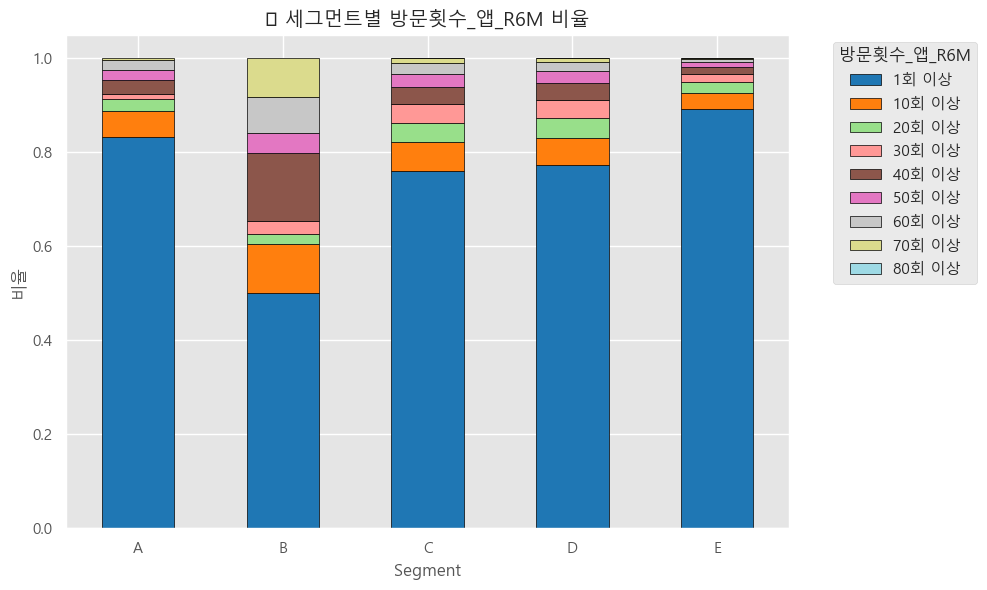

In [52]:
# 막대그래프
import matplotlib.pyplot as plt

# 스타일 설정 (선택)
plt.style.use("ggplot")

# 데이터 (이미 준비된 비율 테이블 사용)
plot_data = tm_contact_ratio_ordered.copy()

# 시각화
plot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20',
    edgecolor='black'
)

# 라벨 및 제목
plt.title("📊 세그먼트별 방문횟수_앱_R6M 비율", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("비율", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="방문횟수_앱_R6M", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

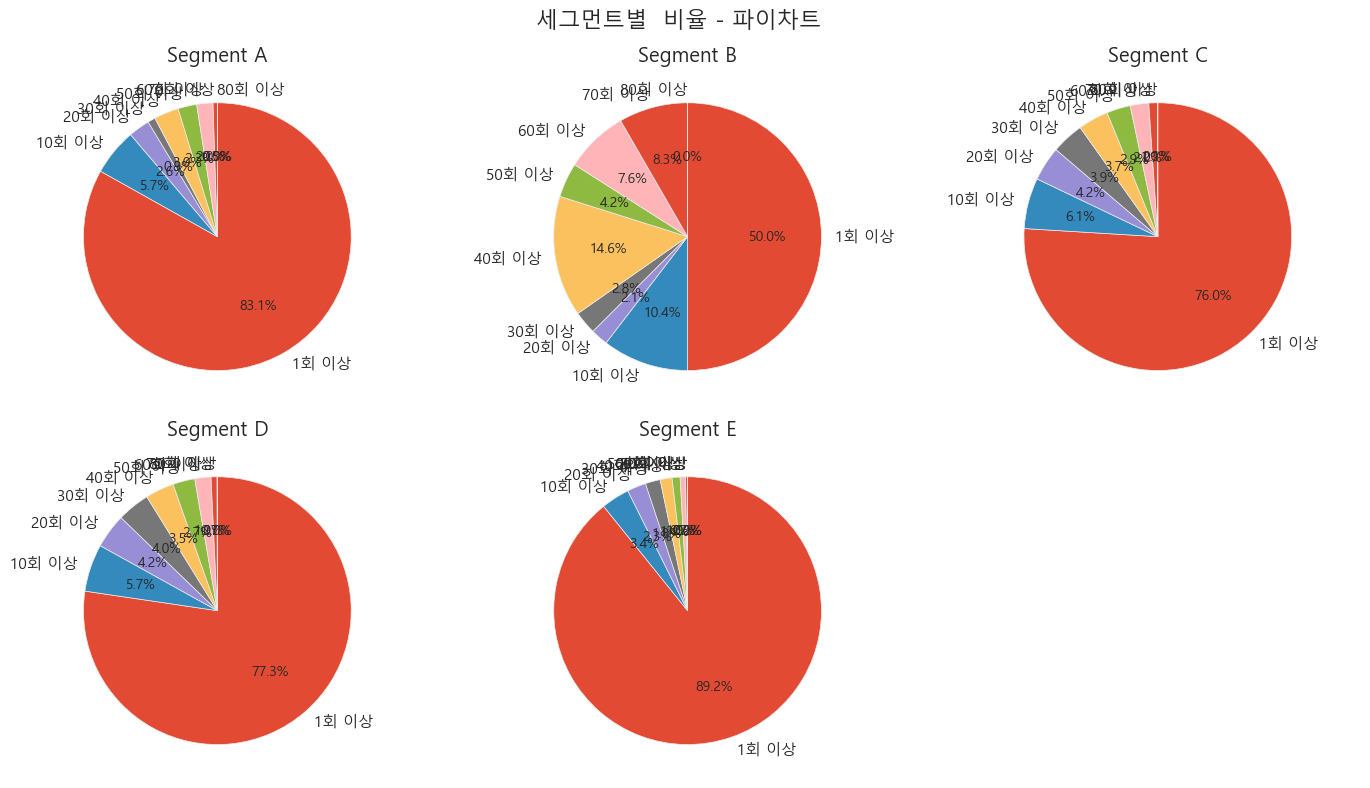

In [53]:
# 파이차트
import matplotlib.pyplot as plt

# 데이터 복사
plot_data = tm_contact_ratio_ordered.copy()

# 세그먼트 리스트
segments = plot_data.index.tolist()

# 서브플롯 설정 (2행 3열)
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

# 파이차트 반복 생성
for i, seg in enumerate(segments):
    axes[i].pie(
        plot_data.loc[seg],
        labels=plot_data.columns,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Segment {seg}")

# 마지막 빈 subplot 제거 (5개만 사용)
for j in range(len(segments), len(axes)):
    axes[j].axis('off')

# 전체 타이틀
plt.suptitle(" 세그먼트별  비율 - 파이차트", fontsize=16)
plt.tight_layout()
plt.show()

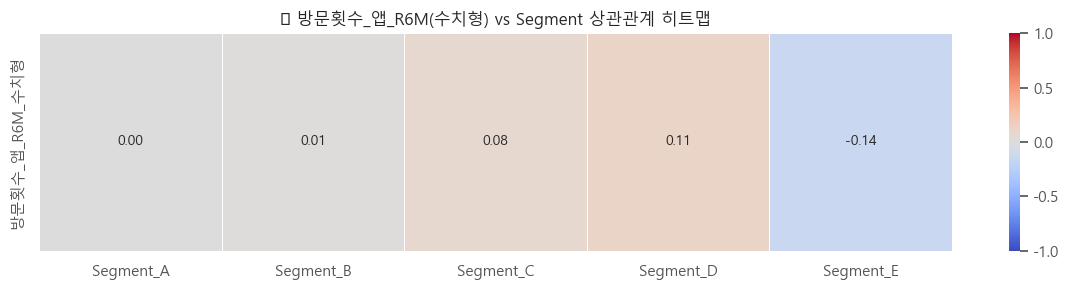

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 매핑 딕셔너리 정의 -----------값 확인하기
# mapping = {
#     "1회 이상": 1,
#     "10회 이상": 10,
#     "20회 이상": 20,
#     "30회 이상": 30 
# }

# mapping = {
#     "1회 이상": 1,
#     "10회 이상": 10,
#     "20회 이상": 20,
#     "30회 이상": 30,
#     "40회 이상": 40
# }

mapping = {
    "1회 이상": 1,
    "10회 이상": 10,
    "20회 이상": 20,
    "30회 이상": 30,
    "40회 이상": 40,
    "50회 이상": 50,
    "60회 이상": 60,
    "70회 이상": 70,
    "80회 이상": 80   
}
# 2. 매핑 적용 → 새 컬럼 생성 (또는 덮어쓰기)
df1["방문횟수_앱_R6M_수치형"] = df1["방문횟수_앱_R6M"].map(mapping)

# 3. 필요한 컬럼만 추출
df_corr = df1[["방문횟수_앱_R6M_수치형", "Segment"]].dropna()

# 4. Segment 원-핫 인코딩
segment_dummies = pd.get_dummies(df_corr["Segment"], prefix="Segment")

# 5. 병합
df_corr_final = pd.concat([df_corr[["방문횟수_앱_R6M_수치형"]], segment_dummies], axis=1)

# 6. 상관관계 계산
corr_matrix = df_corr_final.corr()

# 7. 히트맵 시각화
plt.figure(figsize=(12, 3))  # 🔹 크기 줄임
sns.heatmap(
    corr_matrix.loc[["방문횟수_앱_R6M_수치형"], segment_dummies.columns],
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    vmax=1,     # 🔹 상관계수 최대값
    vmin=-1     # 🔹 상관계수 최소값
)
plt.title("🧭 방문횟수_앱_R6M(수치형) vs Segment 상관관계 히트맵", fontsize=12)
plt.tight_layout()
plt.show()